In [ ]:
#Declaring some variables...
unit_layer_1=20
unit_layer_2=10
unit_layer_3=15
unit_layer_output=1
input_dimension=13
layer_1_activation='relu'
layer_2_activation='relu'
layer_3_activation='relu'
layer_4_activation='sigmoid'
batch_sizee=11
epochs_no=500
lamda=0.00002

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
#Importing all important models and libraries......
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
import h5py
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import plot_confusion_matrix
from google.colab import files
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from keras import regularizers
from keras.layers import Dropout
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
#Uploading Dataset....
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))


Saving heart.csv to heart (4).csv


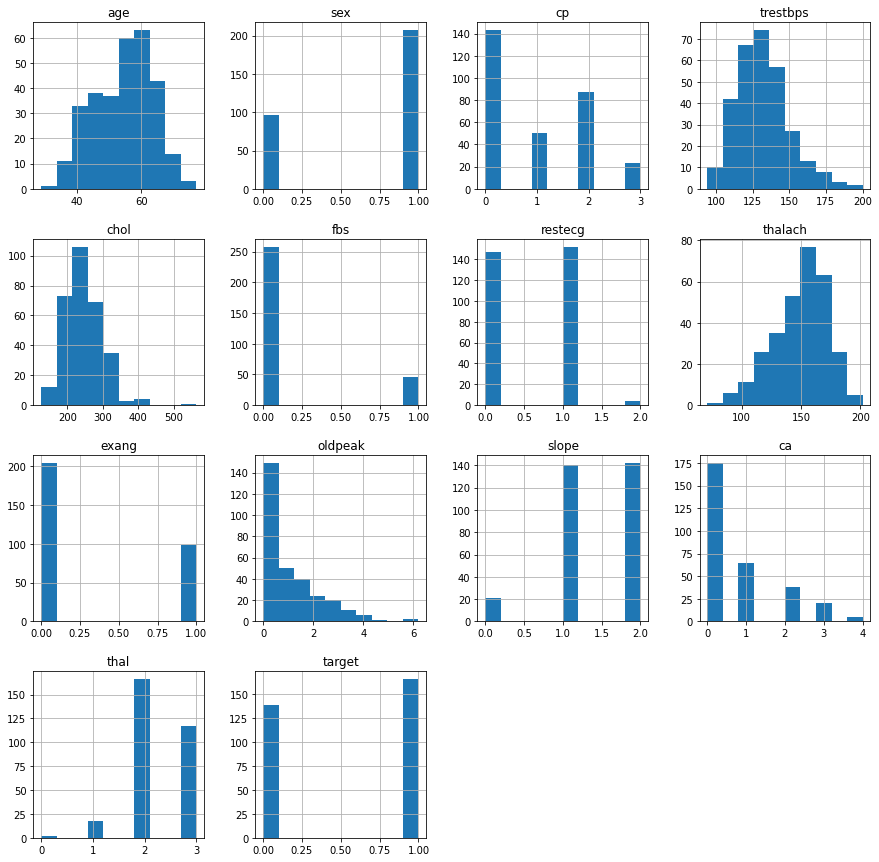

In [ ]:
#Dataset description....
#1.age
#2.sex
#3.chest pain type (4 values)
#4.resting blood pressure
#5.serum cholestoral in mg/dl
#6.fasting blood sugar > 120 mg/dl
#7.resting electrocardiographic results (values 0,1,2)
#8.maximum heart rate achieved
#9.exercise induced angina
#10.oldpeak = ST depression induced by exercise relative to rest
#11.the slope of the peak exercise ST segment
#12.number of major vessels (0-3) colored by flourosopy
#13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#14.target - is the binary target variable, 0 indicates that the patient has heart disease, the value is 1 if not.



# plot histograms for each variable
df.hist(figsize = (15, 15))
plt.show()
print(" ")



In [ ]:
#Preview of dataset...
df.loc[:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Defining features(X) and labels(Y)....
X = df.drop('target',axis =1).values
y = df['target'].values

#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
 



In [ ]:
#Preview of Train and test data....
print("Train Dataset:")

print("Training features: ")
print(" ")
print(X_train)
print(" ")

print("Training labels: ")
print(" ")
print(y_train)
print(" ")
print(" ")


print("Test Dataset:")

print("Testing features: ")
print(" ")
print(X_train)
print(" ")

print("Testing labels: ")
print(" ")
print(y_test)
print(" ")

Train Dataset:
Training features: 
 
[[46.  1.  0. ...  1.  2.  3.]
 [59.  1.  0. ...  1.  2.  1.]
 [50.  0.  0. ...  2.  0.  2.]
 ...
 [46.  1.  1. ...  2.  0.  3.]
 [41.  1.  1. ...  1.  0.  1.]
 [48.  0.  2. ...  2.  0.  2.]]
 
Training labels: 
 
[0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1]
 
 
Test Dataset:
Testing features: 
 
[[46.  1.  0. ...  1.  2.  3.]
 [59.  1.  0. ...  1.  2.  1.]
 [50.  0.  0. ...  2.  0.  2.]
 ...
 [46.  1.  1. ...  2.  0.  3.]
 [41.  1.  1. ...  1.  0.  1.]
 [48.  0.  2. ...  2.  0.  2.]]
 
Testing labels: 
 
[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0

In [ ]:
#Defining a model with 3 hidden layers and an output layer......

model = Sequential()
model.add(Dense(unit_layer_1,kernel_initializer='normal',kernel_regularizer=regularizers.l2(lamda),input_dim=input_dimension,activation=layer_1_activation))
model.add(Dense(unit_layer_2,kernel_initializer='normal',kernel_regularizer=regularizers.l2(lamda),activation=layer_2_activation))
model.add(Dense(unit_layer_3,kernel_initializer='normal',kernel_regularizer=regularizers.l2(lamda),activation=layer_3_activation))
#model.add(Dense(50,activation='sigmoid'))
#model.add(Dense(70,activation='relu'))
model.add(Dense(unit_layer_output,activation=layer_4_activation))


In [ ]:
#Compileing defined model.......

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
#Early stopping and model saving.....

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint('heart_disease_model4.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
# Fit the defined model......

history=model.fit(X_train,y_train,batch_size=batch_sizee,epochs=epochs_no,validation_data=(X_test,y_test),callbacks=[es,mc])


Epoch 1/500
20/20 [==============================] - 0s 9ms/step - loss: 0.2432 - accuracy: 0.5472 - val_loss: 0.2362 - val_accuracy: 0.6484
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.6226 - val_loss: 0.2289 - val_accuracy: 0.6484
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.6368 - val_loss: 0.2205 - val_accuracy: 0.6484
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.6604 - val_loss: 0.2132 - val_accuracy: 0.6703
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.6745 - val_loss: 0.2244 - val_accuracy: 0.6264
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.6462 - val_loss: 0.2475 - val_accuracy: 0.5714
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.6321 - val_loss: 0.2148 - val_accuracy: 0.6593
Epoch 8/500
2

In [ ]:
#Prediction process.....

y_pred = model.predict(X_test)

  


In [ ]:
y_pred

array([[0.02247784],
       [0.91832256],
       [0.7610323 ],
       [0.9819834 ],
       [0.0443069 ],
       [0.88566744],
       [0.9571183 ],
       [0.03727898],
       [0.07855615],
       [0.81352293],
       [0.05278912],
       [0.840328  ],
       [0.08684686],
       [0.4737164 ],
       [0.8205604 ],
       [0.8910933 ],
       [0.9789748 ],
       [0.82352054],
       [0.8962997 ],
       [0.01777077],
       [0.02805966],
       [0.5302936 ],
       [0.7384903 ],
       [0.8065969 ],
       [0.31345382],
       [0.9509135 ],
       [0.04480869],
       [0.6826704 ],
       [0.04471451],
       [0.09353545],
       [0.02325931],
       [0.7728342 ],
       [0.11986876],
       [0.6451032 ],
       [0.98097956],
       [0.62343097],
       [0.9137326 ],
       [0.7645713 ],
       [0.91338533],
       [0.9708266 ],
       [0.12049541],
       [0.95927167],
       [0.88803893],
       [0.7612267 ],
       [0.30911326],
       [0.26467848],
       [0.30518585],
       [0.964

In [ ]:
#Applying threshold 0.5
Predicted_output = []
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    Predicted_output.append(1)
   # print('%.2f (expected %d)' % (1, y_test[i]))

  else:
      Predicted_output.append(0)
     # print('%.2f (expected %d)' % (0, y_test[i]))



#Actual output vs predicted output....

for i in range(len(Predicted_output)):
  if(Predicted_output[i]>0.5):
    print('%.2f (expected %d)' % (1, y_test[i]))

  else:
        print('%.2f (expected %d)' % (0, y_test[i]))

0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 0)
1.00 (expected 0)
1.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 0)
0.00 (expected 0)
1.00 (expected 0)
1.00 (expected 0)
0.00 (expe

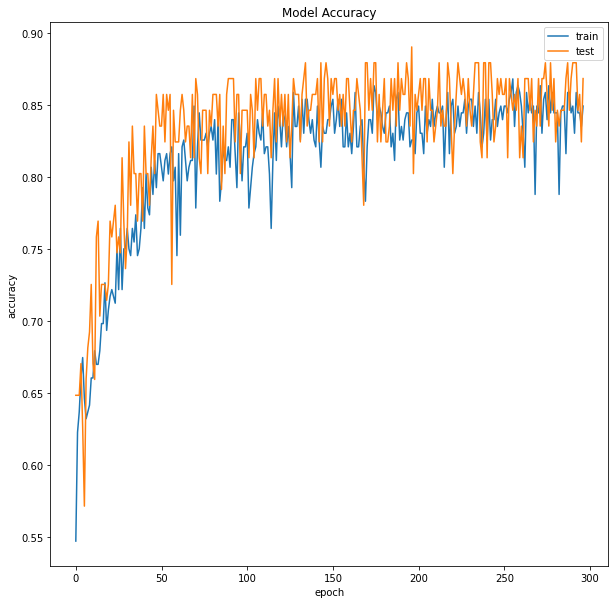

In [ ]:
#Graphical presantation of model Accuracy....
%matplotlib inline
# Model Accuracy 
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
print(" ")
print(" ")

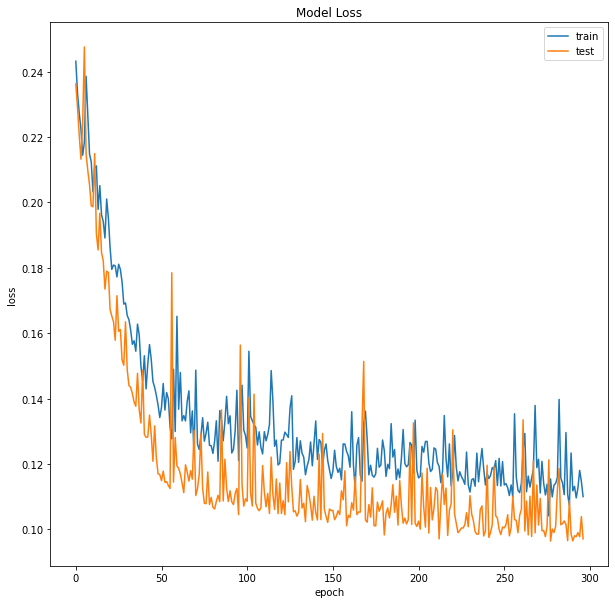

In [ ]:
#Graphical presantation of model Loss....

# Model loss
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
print(" ")
print(" ")


In [ ]:
#Some error list....
print("Error list...")
print(" ")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print(" ")
print(" ")


Error list...
 
MAE: 0.20625217308054913
MSE: 0.09674433958965835
RMSE: 0.31103752119263417
VarScore: 0.6147248775912761
 
 


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, Predicted_output)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,Predicted_output)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, Predicted_output)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,  Predicted_output)
print('ROC AUC: %f' % auc)
print(" ")


Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.830189
Recall: 0.936170
F1 score: 0.880000
ROC AUC: 0.865812
 


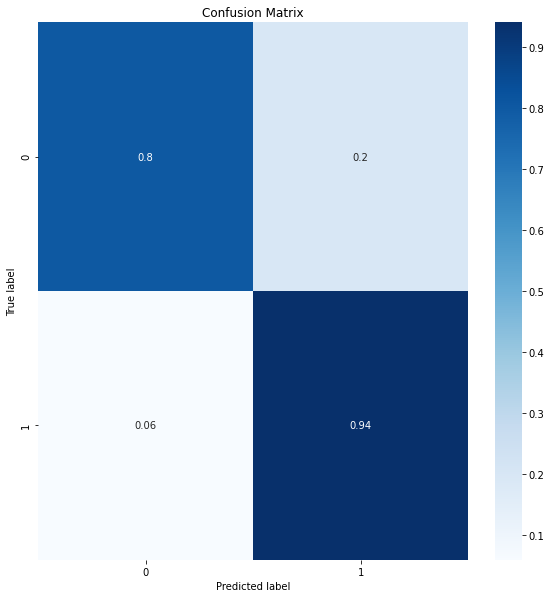

In [ ]:
# Graphical view of Confusion matrix......
classes=[0,1]

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=Predicted_output).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Generate classification report using predictions for binary model
print(" ")
print('Results for Binary Model')
print((accuracy_score(y_test,  Predicted_output))*100)
print(classification_report(y_test,  Predicted_output))
 

 
Results for Binary Model
86.81318681318682
              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
new_model = tf.keras.models.load_model('heart_disease_model.h5')
scores = new_model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.10690432041883469, 0.8681318759918213]
